In [126]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# level definition
# low, medium, high = 1, 2, 3

In [127]:
# Prepare data

houses_by_lga = pd.read_csv("Houses by LGA.csv")
houses_by_lga.set_index(["LGA", "Year"], inplace=True)

offences_by_lga = pd.read_csv("Offences By LGA NEW.csv")
offences_by_lga.set_index(["LGA", "Year"], inplace=True)

egm_by_lga = pd.read_csv("EGM-New-Format.csv")
egm_by_lga.set_index(["LGA", "Year"], inplace=True)



merged_data = houses_by_lga.merge(offences_by_lga, how="inner", on=["LGA", "Year"]) \
                           .merge(egm_by_lga, how="inner", on=["LGA", "Year"])

merged_data.rename(columns={"total dollars" : "Total Loss On EGM", "rate" : "EGM Rate"}, inplace=True)

merged_data

,,Weighted House Price,Type A Percentage,Type B Percentage,Type C Percentage,Type D Percentage,Type E Percentage,Offence Rate,Total Loss On EGM,EGM Rate
LGA,Year,,,,,,,,,
Yarra,2016,1278619.71,9.86,69.94,6.33,6.51,7.10,15074.17,3.299235e+07,401.04
Moonee Valley,2016,1014690.20,12.11,67.44,5.70,5.18,9.41,7827.72,7.540108e+07,651.95
Brimbank,2016,538872.26,13.47,59.99,7.65,6.13,12.63,9375.09,1.430457e+08,689.02
Port Phillip,2016,1564173.34,11.26,69.41,5.90,6.31,6.84,12520.83,2.809594e+07,322.63
Ballarat,2016,334852.68,15.16,61.04,4.03,5.67,13.86,11679.23,5.461125e+07,466.93
...,...,...,...,...,...,...,...,...,...,...
Melbourne,2020,1437999.93,12.28,48.29,8.97,8.05,8.44,21397.63,6.055093e+07,498.27
Frankston,2020,660194.72,15.29,40.30,8.99,7.12,19.05,10397.28,4.630308e+07,350.90
Nillumbik,2020,950270.23,16.40,50.02,6.73,7.35,15.26,3555.55,2.778951e+07,378.91


In [128]:
# Level generators

# Definitoins for Offence Rate Level

# mean_offence_rate = merged_data["Offence Rate"].mean()

# low_offence_rate = mean_offence_rate*0.7
# high_offence_rate = mean_offence_rate*1.3

low_offence_rate = merged_data["Offence Rate"].quantile(.30)
high_offence_rate = merged_data["Offence Rate"].quantile(.70)



def offence_rate_level_generator(offence_rate):
    if offence_rate < low_offence_rate:
        return "Low"
    elif (offence_rate >= low_offence_rate) and (offence_rate <= high_offence_rate):
        return "Medium"
    else:
        return "High"
    

# Defininitions for Total Loss On EGM Level

# low_egm = 10_000_000
# high_egm = 50_000_000
low_egm = merged_data["Total Loss On EGM"].quantile(.30)
high_egm = merged_data["Total Loss On EGM"].quantile(.70)

def total_loss_on_egm_level_generator(egm_loss):
    if egm_loss < low_egm:
        return "Low"
    elif low_egm <= egm_loss <= high_egm:
        return "Medium"
    else:
        return "High"

# Definitions for EGM Rate Level
low_egm_rate = merged_data["EGM Rate"].quantile(.30)
high_egm_rate = merged_data["EGM Rate"].quantile(.70)

def egm_rate_level_generator(egm_rate):
    if egm_rate < low_egm_rate:
        return "Low"
    elif low_egm_rate <= egm_rate <= high_egm_rate:
        return "Medium"
    else:
        return "High"
    
# Definitions for Weighted House Price Level
low_weighted_house_price = 600_000
high_weighted_house_price = 1_000_000
# low_weighted_house_price = merged_data["Weighted House Price"].quantile(.333)
# medium_weighted_house_price = merged_data["Weighted House Price"].quantile(.50)
# high_weighted_house_price = merged_data["Weighted House Price"].quantile(.667)

def weighted_house_price_level_generator(weighted_house_price):
    if weighted_house_price < low_weighted_house_price:
        return "Low"
    elif low_weighted_house_price <= weighted_house_price < high_weighted_house_price:
        return "Medium"
    else:
        return "High"

In [129]:
# pd.concat([merged_data[merged_data.index.get_level_values("Year") == 2016], merged_data[merged_data.index.get_level_values("Year") == 2017]])
    

    
merged_data["Offence Rate Level"] = merged_data["Offence Rate"].apply(offence_rate_level_generator)
merged_data["Total Loss On EGM Level"] = merged_data["Total Loss On EGM"].apply(total_loss_on_egm_level_generator)
merged_data["EGM Rate Level"] = merged_data["EGM Rate"].apply(egm_rate_level_generator)
merged_data["Weighted House Price Level"] = merged_data["Weighted House Price"].apply(weighted_house_price_level_generator)


print(len(merged_data))
merged_data

merged_data["Weighted House Price Level"].value_counts()
merged_data

165


,,Weighted House Price,Type A Percentage,Type B Percentage,Type C Percentage,Type D Percentage,Type E Percentage,Offence Rate,Total Loss On EGM,EGM Rate,Offence Rate Level,Total Loss On EGM Level,EGM Rate Level,Weighted House Price Level
LGA,Year,,,,,,,,,,,,,
Yarra,2016,1278619.71,9.86,69.94,6.33,6.51,7.10,15074.17,3.299235e+07,401.04,High,Low,Medium,High
Moonee Valley,2016,1014690.20,12.11,67.44,5.70,5.18,9.41,7827.72,7.540108e+07,651.95,Medium,Medium,High,High
Brimbank,2016,538872.26,13.47,59.99,7.65,6.13,12.63,9375.09,1.430457e+08,689.02,High,High,High,Low
Port Phillip,2016,1564173.34,11.26,69.41,5.90,6.31,6.84,12520.83,2.809594e+07,322.63,High,Low,Low,High
Ballarat,2016,334852.68,15.16,61.04,4.03,5.67,13.86,11679.23,5.461125e+07,466.93,High,Medium,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Melbourne,2020,1437999.93,12.28,48.29,8.97,8.05,8.44,21397.63,6.055093e+07,498.27,High,Medium,Medium,High
Frankston,2020,660194.72,15.29,40.30,8.99,7.12,19.05,10397.28,4.630308e+07,350.90,High,Low,Low,Medium
Nillumbik,2020,950270.23,16.40,50.02,6.73,7.35,15.26,3555.55,2.778951e+07,378.91,Low,Low,Medium,Medium


In [130]:
results = pd.DataFrame(columns=["Training Size", "Test Size", "k-nn", "Test Number", "Accuracy"])

X_COLS = [
    "Offence Rate",
    "EGM Rate"
]

Y_COL = [
    "Weighted House Price Level"
]

total_data_size = len(merged_data)
training_size = 132


for k in range(1, 21):
    for i in range(1, 101):
        train = merged_data.sample(training_size)
        test = merged_data.drop(train.index)

        Xtrain = train[X_COLS]
        ytrain = train[Y_COL]

        Xtest = test[X_COLS]
        ytest = test[Y_COL]

        knn = KNeighborsClassifier(n_neighbors=k)

        knn.fit(Xtrain, ytrain.values.ravel())

        y_pred = knn.predict(Xtest)
        accuracy = knn.score(Xtest, ytest)

        results.loc[len(results)] = [
            training_size, 
            total_data_size-training_size,
            k,
            i,
            accuracy,
            ]



results

,Training Size,Test Size,k-nn,Test Number,Accuracy
0,132.0,33.0,1.0,1.0,0.424242
1,132.0,33.0,1.0,2.0,0.575758
2,132.0,33.0,1.0,3.0,0.636364
3,132.0,33.0,1.0,4.0,0.606061
4,132.0,33.0,1.0,5.0,0.575758
...,...,...,...,...,...
1995,132.0,33.0,20.0,96.0,0.515152
1996,132.0,33.0,20.0,97.0,0.575758
1997,132.0,33.0,20.0,98.0,0.545455
1998,132.0,33.0,20.0,99.0,0.636364


In [131]:
results = results.astype({"Training Size": int, "Test Size" : int, "k-nn": int})
results.set_index(["Training Size", "Test Size", "k-nn"], inplace=True)


results_mean = results.drop("Test Number", axis=1).groupby(["Training Size", "Test Size", "k-nn"]).mean()
results_mean["Accuracy"] = round(results_mean["Accuracy"], 2)
results_mean.to_csv("K-nn mean accuracy.csv")

results_mean



Accuracy
Training Size Test Size k-nn          
132           33        1         0.59
                        2         0.56
                        3         0.61
                        4         0.61
                        5         0.62
                        6         0.62
                        7         0.61
                        8         0.61
                        9         0.63
                        10        0.63
                        11        0.65
                        12        0.64
                        13        0.66
                        14        0.63
                        15        0.64
                        16        0.65
                        17        0.64
                        18        0.62
                        19        0.64
                        20        0.63

Text(0.5, 0, 'Number of Neighbours')

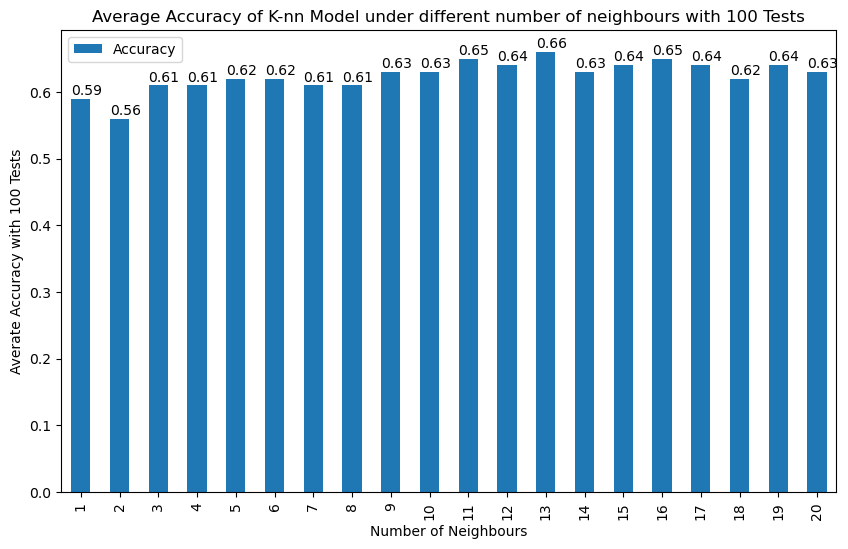

In [139]:

ax = results_mean.reset_index().plot.bar(
    x="k-nn",
    y="Accuracy",
    figsize=(10, 6)
)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01))


plt.title("Average Accuracy of K-nn Model under different number of neighbours with 100 Tests")
plt.ylabel("Averate Accuracy with 100 Tests")
plt.xlabel("Number of Neighbours")

In [157]:
train = merged_data.sample(training_size)
test = merged_data.drop(train.index)

Xtrain = train[X_COLS]
ytrain = train[Y_COL]

Xtest = test[X_COLS]
ytest = test[Y_COL]

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(Xtrain, ytrain.values.ravel())

y_pred = knn.predict(Xtest)
accuracy = knn.score(Xtest, ytest)
accuracy

0.7272727272727273

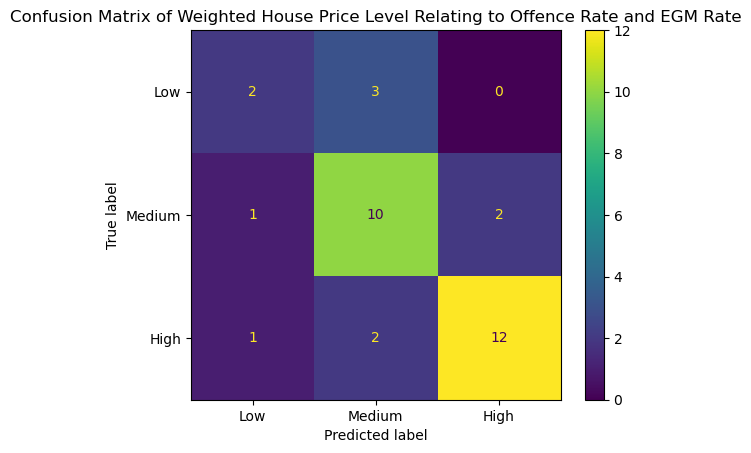

In [160]:
cm = confusion_matrix(ytest,
                      y_pred,
                      labels=["Low", "Medium" , "High"]
                      )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Low", "Medium" , "High"]
                              )

disp.plot()

plt.title("Confusion Matrix of Weighted House Price Level Relating to Offence Rate and EGM Rate")
plt.show()